In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# irisデータセットの準備
iris = load_iris()
feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = pd.DataFrame(iris.data)
X.columns = feature

y = y = pd.DataFrame(iris.target, columns=["species"])
name = ["species"] 
y.columns = name

In [3]:
Xy = X.join( y) 

In [4]:
# virgicolorとvirginicaのデータ抽出
df= Xy[Xy['species']>=1]
df.loc[df['species'] == 1, 'species'] = 0
df.loc[df['species'] == 2, 'species'] = 1
X = df.loc[: , ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df.loc[:, ['species']]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

In [5]:
# 1の列追加
X = X.values
X1=  np.insert(X, 0, 1, axis=1)
y1 = y.values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=32)

In [7]:
# 重みとバイアスの初期値の作成
n = X_train.shape[1]
np.random.seed(0)
theta = np.random.rand(n,)
theta

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

In [8]:
# 仮定関数
def _hypothesis(X, theta):
    """
    説明を記述
    -------------------
    X:配列
    w: 重みとバイアス
    戻り値: 予測値
    """
    # シグモイド関数
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    yp = sigmoid(X @ theta)
    return yp.reshape(-1, 1)

In [9]:
yp = _hypothesis(X_train, theta)
yp.shape

(80, 1)

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [10]:
def _gradient_descent( X, y, theta, yp, k):
    """
    説明を記述
    -------------------
    alpha : 学習率
    m : 入力されるデータの数
    x : 特徴量ベクトル
    y:  正解ラベル
    theta : パラメータ（重み）ベクトル
    yp : 仮定関数結果
    ramda : 正則化パラメータ(適当な値)  
    
    """
    #ハイパーパラメータ
    alpha = 0.001
    lambda_ = 0.001
    
    m = y.shape[0]
    
    # 0番目のthetaの場合の正則化項の処理用の値判定
    if k == 0:
        j = 0
    else:
        j = 1
    
    grad = ((1/ m) * (yp - y).T @ X) 
    reg = (lambda_ / m / 2) * theta * j
    theta = theta - alpha * (grad + reg)

    return theta

In [11]:
#  学習回数
num_iter = 10

for k in range(num_iter):
    theta = _gradient_descent(X_train, y_train, theta, yp, k)

In [12]:
theta.shape

(1, 5)

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 
hθ(x)の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

In [13]:
def predict(pred_proba):
    """
    ロジスティック回帰を使いラベルを推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """
    # 闘値を０.５に設定し
    pred = np.where(pred_proba < 0.5, 0, 1)
    return pred

In [14]:
def predict_proba(X, theta):
    """
    ロジスティック回帰を使い確率を推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """
    # シグモイド関数
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    pred_proba = sigmoid(X @ theta.T)
    
    return pred_proba

In [15]:
pre = predict_proba(X_test, theta)

# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

なお、この数式には正則化項が含まれています。

In [16]:
#損失関数（クロスエントロピー）
def cost_func(y, yp, theta):
    """
    説明を記述
    -------------------
    alpha : 学習率
    m : 入力されるデータの数
    x : 特徴量ベクトル
    y:  正解ラベル
    theta : パラメータ（重み）ベクトル
    yp : 仮定関数結果
    ramda : 正則化パラメータ(適当な値)  
    i : 学習回数
    """
    #ハイパーパラメータ
    alpha = 0.01
    lambda_ = 0.01
    
    m = y.shape[0]
    
    cross = (1/ m) * (-y * np.log(yp) - (1- y) * np.log(1 - yp)).sum() 
    L2 = (lambda_ / (2 * m) * (theta**2).sum())
    
    loss = cross + L2
    
    return loss

In [17]:
#  学習回数
num_iter = 100
loss = np.zeros(num_iter)

for k in range(num_iter):
    loss[k] = cost_func(y_train, yp, theta)

loss

array([4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084215,
       4.52084215, 4.52084215, 4.52084215, 4.52084215, 4.52084

## 最終的なモデル

In [18]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    alpha : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.theta : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=1000, alpha=0.01,lambda_=0.01, bias=None, verbose=None):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.alpha = alpha
        self.lambda_ = lambda_
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        y = np.array(y)
        X = np.array(X)
        if np.any(X_val):
            y_val = np.array(y_val)
            X_val = np.array(X_val)
        
        if  not self.bias:
            X = np.insert(X, 0, 1, axis=1)
            if np.any(X_val):
                print(yes)
                X_val = np.insert(X_val, 0, 1, axis=1)
        
        # 重みとバイアスの初期値の作成
        n = X.shape[1]
        np.random.seed(0)
        self.theta = np.random.rand(n)

        
        #　学習
        for k in range(self.iter):
            # 予測関数の呼び出し
            y_pred1 = self._hypothesis(X)

            # 最急降下法で学習
            self._gradient_descent(X, y, y_pred1, k)

            #　lossの記録
            self.loss[k] = self._cost_func(y, y_pred1)

            if self.verbose:
                print("loss: ", self.loss[k])
            
        # valの引数がある場合の処理
        if np.any(y_val):
            n = X_val.shape[1]
            np.random.seed(0)
            self.theta = np.random.rand(n)
            
            # 学習
            for k in range(self.iter):
                # 予測関数の呼び出し
                y_pred2 = self._hypothesis(X_val)

                # 最急降下法で学習
                self._gradient_descent(X_val, y_val, y_pred2, k)

                #　lossの記録
                self.val_loss[k] = self._cost_func(y_val, y_pred2)

                if self.verbose:
                    print("val_oss: ", self.val_loss[k])

                    
    
    # 仮定関数
    def _hypothesis(self, X):
        """
        説明を記述
        -------------------
        X:配列
        w: 重みとバイアス
        戻り値: 予測値
        """
        # シグモイド関数
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))

        yp = sigmoid(X @ self.theta.T)
        return yp.reshape(-1, 1)
    
    def _gradient_descent(self, X,  y, yp, k):
        """
        勾配降下法でtheta更新
        -------------------
        alpha : 学習率
        m : 入力されるデータの数
        x : 特徴量ベクトル
        y:  正解ラベル
        theta : パラメータ（重み）ベクトル
        yp : 仮定関数結果
        ramda : 正則化パラメータ(適当な値)  

        """
        m = y.shape[0]

        # 0番目のthetaの場合の正則化項の処理用の値判定
        if k == 0:
            j = 0
        else:
            j = 1

        grad = ((1/ m) * (yp - y).T @ X) 
        reg = (self.lambda_ / m / 2) * self.theta * j
        self.theta = self.theta - self.alpha * (grad + reg)
    
    #損失関数（クロスエントロピー）
    def _cost_func(self, y, yp):
        """
        説明を記述
        -------------------
        alpha : 学習率
        m : 入力されるデータの数
        x : 特徴量ベクトル
        y:  正解ラベル
        theta : パラメータ（重み）ベクトル
        yp : 仮定関数結果
        ramda : 正則化パラメータ(適当な値)  
        i : 学習回数
        """
        m = y.shape[0]

        cross = (1/ m) * (-1 * y * np.log(yp) - (1- y) * np.log(1 - yp)).sum() 
        L2 = (self.lambda_ / (2 * m)) * (self.theta**2).sum()

        loss = cross + L2

        return loss
    
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 闘値を０.５に設定し
        pred = np.where(X < 0.5, 0, 1)
        return pred

    def predict_proba(self,X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X = np.array(X)
        #if  not self.bias:
            #X = np.insert(X, 0, 1, axis=1)
            
        # シグモイド関数
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))

        pred_proba = sigmoid(X @ self.theta.T)

        return pred_proba

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください

In [19]:
# virgicolorとvirginicaのデータ抽出
df= Xy[Xy['species']>=1]
df.loc[df['species'] == 1, 'species'] = 0
df.loc[df['species'] == 2, 'species'] = 1
X = df.loc[: , ['sepal_length',  'petal_length']]
y = df.loc[:, ['species']]

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
SR = ScratchLogisticRegression(num_iter=1000, alpha=0.01,lambda_=0.01, bias=True, verbose=True)

In [22]:
SR.fit(X_train, y_train, X_val=X_val, y_val=y_val)

loss:  3.1212393587338436
loss:  2.991087228121476
loss:  2.861174467354291
loss:  2.7315754098138694
loss:  2.6023840496363744
loss:  2.473722207981159
loss:  2.3457473424035684
loss:  2.2186621941985036
loss:  2.0927264381601627
loss:  1.9682702947523152
loss:  1.8457096657197039
loss:  1.7255616667000695
loss:  1.6084583639514716
loss:  1.49515505094762
loss:  1.3865276831060631
loss:  1.283552647243768
loss:  1.187261921681651
loss:  1.0986693740694888
loss:  1.018670725364768
loss:  0.9479302436224517
loss:  0.8867780769799759
loss:  0.8351469577301998
loss:  0.7925701261535377
loss:  0.7582440824493027
loss:  0.7311385292866125
loss:  0.7101228253984738
loss:  0.6940791096467682
loss:  0.6819836902087504
loss:  0.6729522483024115
loss:  0.6662544339233789
loss:  0.6613076018641664
loss:  0.6576591640716383
loss:  0.6549646689923111
loss:  0.6529660298944147
loss:  0.6514721661165289
loss:  0.6503428921971764
loss:  0.6494760782566136
loss:  0.6487977177159366
loss:  0.64825440467

loss:  0.5276156333940631
loss:  0.5274920640885864
loss:  0.5273685755225366
loss:  0.5272451676282114
loss:  0.5271218403379687
loss:  0.5269985935842261
loss:  0.526875427299461
loss:  0.5267523414162106
loss:  0.5266293358670717
loss:  0.526506410584701
loss:  0.5263835655018148
loss:  0.5262608005511885
loss:  0.5261381156656578
loss:  0.5260155107781176
loss:  0.5258929858215219
loss:  0.525770540728885
loss:  0.5256481754332798
loss:  0.525525889867839
loss:  0.5254036839657544
loss:  0.5252815576602772
loss:  0.525159510884718
loss:  0.5250375435724466
loss:  0.5249156556568915
loss:  0.5247938470715408
loss:  0.5246721177499415
loss:  0.5245504676256997
loss:  0.5244288966324808
loss:  0.5243074047040084
loss:  0.524185991774066
loss:  0.5240646577764954
loss:  0.5239434026451972
loss:  0.5238222263141311
loss:  0.5237011287173157
loss:  0.5235801097888279
loss:  0.5234591694628035
loss:  0.523338307673437
loss:  0.5232175243549818
loss:  0.5230968194417491
loss:  0.5229761928

val_oss:  0.5601525127366056
val_oss:  0.5600308650163587
val_oss:  0.5599093029416888
val_oss:  0.5597878264423735
val_oss:  0.5596664354482471
val_oss:  0.5595451298892015
val_oss:  0.5594239096951853
val_oss:  0.559302774796204
val_oss:  0.5591817251223206
val_oss:  0.5590607606036546
val_oss:  0.5589398811703824
val_oss:  0.5588190867527375
val_oss:  0.5586983772810101
val_oss:  0.5585777526855475
val_oss:  0.5584572128967538
val_oss:  0.5583367578450891
val_oss:  0.5582163874610714
val_oss:  0.5580961016752742
val_oss:  0.5579759004183292
val_oss:  0.5578557836209231
val_oss:  0.5577357512138001
val_oss:  0.5576158031277613
val_oss:  0.5574959392936635
val_oss:  0.5573761596424206
val_oss:  0.5572564641050028
val_oss:  0.5571368526124371
val_oss:  0.5570173250958061
val_oss:  0.5568978814862499
val_oss:  0.5567785217149642
val_oss:  0.5566592457132012
val_oss:  0.5565400534122696
val_oss:  0.5564209447435345
val_oss:  0.5563019196384168
val_oss:  0.5561829780283936
val_oss:  0.556

In [23]:
N = SR.predict_proba(X_val)

In [24]:
y_pred = SR.predict(N)

In [25]:
from sklearn.metrics import accuracy_score
# 実装したデータの正解率
print("スクラッチ正解率：", accuracy_score(y_val, y_pred))

スクラッチ正解率： 0.8


In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred2 = lr.predict(X_val)  
print("sklearn正解率：", accuracy_score(y_val, y_pred2))

sklearn正解率： 0.85


# 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

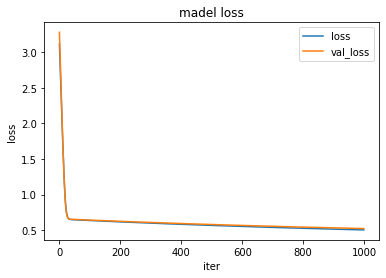

In [28]:
plt.plot(SR.loss, label="loss")
plt.plot(SR.val_loss, label="val_loss")
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('madel loss')
plt.legend()
plt.show();

# 【問題7】決定領域の可視化
決定領域を可視化してください。

In [29]:
# 分類問題の決定境界線を引くために特徴量を2つにして再計算
# virgicolorとvirginicaのデータ抽出
df= Xy[Xy['species']>=1]
df.loc[df['species'] == 1, 'species'] = 0
df.loc[df['species'] == 2, 'species'] = 1
X3 = df.loc[: , ['sepal_length', 'petal_length']]
y3 = df.loc[:, ['species']]
X_train, X_val, y_train, y_val = train_test_split(X3, y3, test_size=0.2, random_state=0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
from sklearn.preprocessing import StandardScaler
#trainデータのフィッテイング
sc_x = StandardScaler()
sc_x.fit(X_train)
#trainとtestデータのtransform
X_train_std = sc_x.transform(X_train)
X_val_std = sc_x.transform(X_val)

In [31]:
SR = ScratchLogisticRegression(num_iter=1000, alpha=0.01,lambda_=0.01, bias=True, verbose=None)
SR.fit(X_train, y_train, X_val=X_val, y_val=y_val)
pred_proba = SR.predict_proba(X_val)
y_pred = SR.predict(pred_proba)
print("正解値：　", accuracy_score(y_val, y_pred2))

正解値：　 0.85


In [32]:
ww = SR.theta
coef = ww[:,1]
intercept = ww[:, 0]

y = y_train.values.ravel()
X_train_std[y==0][:,1]


array([-1.88337549, -1.04231467, -0.80201157, -2.24383013, -0.20125384,
        0.1592008 , -0.44155693, -0.44155693, -1.04231467, -0.32140539,
       -0.32140539, -0.56170848, -0.92216312, -0.56170848, -0.92216312,
       -0.44155693, -0.20125384, -0.44155693, -0.44155693, -0.80201157,
       -0.44155693, -0.20125384, -1.6430724 , -1.40276931, -1.16246621,
       -1.52292085, -1.16246621, -1.6430724 , -0.92216312, -0.08110229,
       -0.56170848, -0.56170848, -0.80201157, -1.04231467, -1.04231467,
       -0.20125384, -1.04231467, -1.16246621, -0.68186003, -0.80201157])

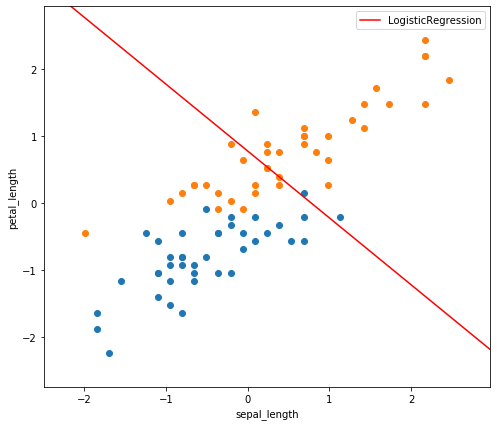

In [34]:
# プロット
plt.figure(figsize=(8, 7))
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.scatter(X_train_std[y==0][:, 0],X_train_std[y==0][:, 1] )
plt.scatter(X_train_std[y==1][:, 0],X_train_std[y==1][:, 1] )
line = np.linspace(-10, 10)
plt.plot(line, -1*(line * coef + intercept)/ coef[0], c='r', label="LogisticRegression")
plt.ylim(X_train_std[:,1].min()-0.5, X_train_std[:,1].max()+0.5)
plt.xlim(X_train_std[:,0].min()-0.5, X_train_std[:,0].max()+0.5)
plt.legend()
plt.show();

# 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

In [35]:
l_theta = SR.theta
print(l_theta)

[[-0.85459577  1.09363282]]


In [36]:
# pickleモジュール呼び出し
import pickle

# 保存
with open('l_theta.pickle', 'wb') as f:
    pickle.dump(l_theta, f)

In [37]:
# 読み込み
with open('l_theta.pickle', 'rb') as f:
    m_theta = pickle.load(f)

In [38]:
print(m_theta)

[[-0.85459577  1.09363282]]


In [39]:
np.array([1, 2, 3, 4, ])

array([1, 2, 3, 4])